<a href="https://colab.research.google.com/github/dwivediparas777/MNIST/blob/master/MNIST_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [0]:
# Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Immporting libraries for basic calculation
import numpy as np

# Importing deep learing library
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

# Importing other library
import time

In [0]:
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

## Load MNIST dataset with the data shuffled between train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)


print("After converting the input images from 3d to 2d vectors")
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)
After converting the input images from 3d to 2d vectors
Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# Lets normalize the data.
# We know that formaula for normalization is X = (X-Xmin)/(Xmax-Xmin)
# And, here Xmin = 0 and Xmax = 255 (pixel values)
# So, X = X/255
X_train = X_train/255
X_test = X_test/255

# Model Genration 2 Hidden Layer
## 784-516-258-10-SequentialModel

In [0]:
# some model parameters
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20
model = Sequential()
model.add(Dense(516, input_dim = 784, activation='relu'))
model.add(Dense(258, input_dim = 516, activation='relu'))
model.add(Dense(10, input_dim = 258, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2274 - acc: 0.9330 - val_loss: 0.1060 - val_acc: 0.9655
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0810 - acc: 0.9752 - val_loss: 0.0864 - val_acc: 0.9712
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0540 - acc: 0.9831 - val_loss: 0.0943 - val_acc: 0.9707
Epoch 4/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0350 - acc: 0.9886 - val_loss: 0.0679 - val_acc: 0.9795
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0265 - acc: 0.9917 - val_loss: 0.0707 - val_acc: 0.9794
Epoch 6/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0216 - acc: 0.9932 - val_loss: 0.0818 - val_acc: 0.9784
Epoch 7/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0181 - acc: 0.9939 - val_loss: 0.0762 - val_acc

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 516)               405060    
_________________________________________________________________
dense_20 (Dense)             (None, 258)               133386    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                2590      
Total params: 541,036
Trainable params: 541,036
Non-trainable params: 0
_________________________________________________________________


Test score: 0.10316445550172403
Test accuracy: 0.98


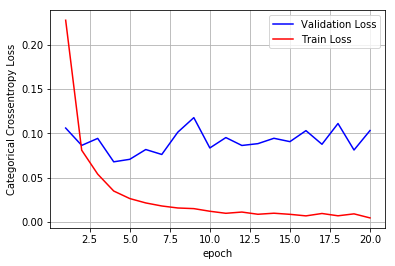

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 784-516-258-10-SequentialModel + BN

In [0]:
# some model parameters
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20
model = Sequential()
model.add(Dense(516, input_dim = 784, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(258, input_dim = 516, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, input_dim = 258, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1685 - acc: 0.9487 - val_loss: 0.1088 - val_acc: 0.9628
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0678 - acc: 0.9797 - val_loss: 0.0834 - val_acc: 0.9745
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0473 - acc: 0.9846 - val_loss: 0.0960 - val_acc: 0.9706
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0349 - acc: 0.9891 - val_loss: 0.0808 - val_acc: 0.9769
Epoch 5/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0292 - acc: 0.9902 - val_loss: 0.0700 - val_acc: 0.9788
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0236 - acc: 0.9919 - val_loss: 0.0602 - val_acc: 0.9806
Epoch 7/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0196 - acc: 0.9934 - val_loss: 0.0800 - val_acc

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 516)               405060    
_________________________________________________________________
batch_normalization_1 (Batch (None, 516)               2064      
_________________________________________________________________
dense_23 (Dense)             (None, 258)               133386    
_________________________________________________________________
batch_normalization_2 (Batch (None, 258)               1032      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                2590      
Total params: 544,132
Trainable params: 542,584
Non-trainable params: 1,548
_________________________________________________________________


Test score: 0.0779808205377387
Test accuracy: 0.9807


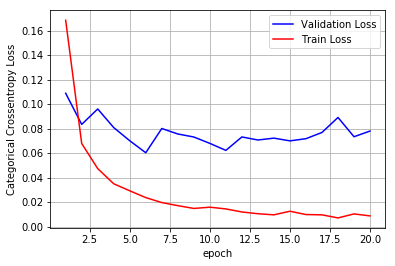

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)    

## 784-516-258-10-SequentialModel + DropOut

In [0]:
# some model parameters
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20
model = Sequential()
model.add(Dense(516, input_dim = 784, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(258, input_dim = 516, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(10, input_dim = 258, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3820 - acc: 0.8814 - val_loss: 0.1368 - val_acc: 0.9574
Epoch 2/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.1749 - acc: 0.9479 - val_loss: 0.0894 - val_acc: 0.9729
Epoch 3/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.1344 - acc: 0.9595 - val_loss: 0.0809 - val_acc: 0.9744
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1120 - acc: 0.9662 - val_loss: 0.0754 - val_acc: 0.9770
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1011 - acc: 0.9684 - val_loss: 0.0704 - val_acc: 0.9786
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0883 - acc: 0.9726 - val_loss: 0.0676 - val_acc: 0.9794
Epoch 7/20
60

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 516)               405060    
_________________________________________________________________
dropout_1 (Dropout)          (None, 516)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 258)               133386    
_________________________________________________________________
dropout_2 (Dropout)          (None, 258)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                2590      
Total params: 541,036
Trainable params: 541,036
Non-trainable params: 0
_________________________________________________________________


Test score: 0.061835459499752866
Test accuracy: 0.984


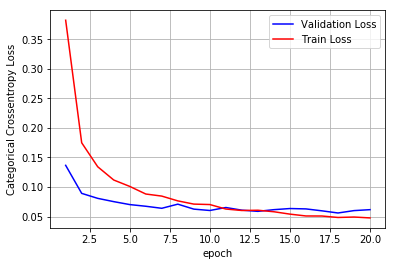

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)    

## 784-516-258-10-SequentialModel + BN + DropOut

In [0]:
# some model parameters
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20
model = Sequential()
model.add(Dense(516, input_dim = 784, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(258, input_dim = 516, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(10, input_dim = 258, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.3705 - acc: 0.8890 - val_loss: 0.1256 - val_acc: 0.9592
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1848 - acc: 0.9434 - val_loss: 0.0949 - val_acc: 0.9712
Epoch 3/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1472 - acc: 0.9543 - val_loss: 0.0830 - val_acc: 0.9738
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1250 - acc: 0.9611 - val_loss: 0.0728 - val_acc: 0.9764
Epoch 5/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1137 - acc: 0.9647 - val_loss: 0.0698 - val_acc: 0.9789
Epoch 6/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0973 - acc: 0.9697 - val_loss: 0.0654 - val_acc: 0.9785
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0937 - acc: 0.9707 - val_loss: 0.0734 - val_acc

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 516)               405060    
_________________________________________________________________
batch_normalization_3 (Batch (None, 516)               2064      
_________________________________________________________________
dropout_3 (Dropout)          (None, 516)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 258)               133386    
_________________________________________________________________
batch_normalization_4 (Batch (None, 258)               1032      
_________________________________________________________________
dropout_4 (Dropout)          (None, 258)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                2590      
Total para

Test score: 0.05232281187833869
Test accuracy: 0.9845


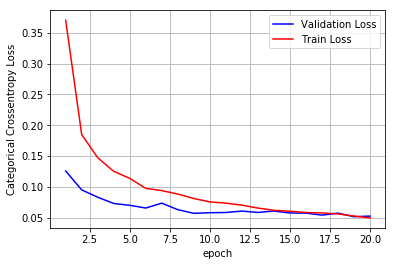

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model Genration 3 Hidden Layer
## 784-582-388-194-10-SequentialModel

In [0]:
# some model parameters
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20
model = Sequential()
model.add(Dense(582, input_dim = 784, activation='relu'))
model.add(Dense(288, input_dim = 582, activation='relu'))
model.add(Dense(194, input_dim = 288, activation='relu'))
model.add(Dense(10, input_dim = 194, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2206 - acc: 0.9330 - val_loss: 0.1024 - val_acc: 0.9691
Epoch 2/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0825 - acc: 0.9749 - val_loss: 0.0960 - val_acc: 0.9712
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0542 - acc: 0.9831 - val_loss: 0.0932 - val_acc: 0.9716
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0408 - acc: 0.9870 - val_loss: 0.0982 - val_acc: 0.9700
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0323 - acc: 0.9894 - val_loss: 0.0757 - val_acc: 0.9785
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0253 - acc: 0.9917 - val_loss: 0.0823 - val_acc: 0.9765
Epoch 7/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0228 - acc: 0.9923 - val_loss: 0.0801 - val_acc

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 582)               456870    
_________________________________________________________________
dense_33 (Dense)             (None, 288)               167904    
_________________________________________________________________
dense_34 (Dense)             (None, 194)               56066     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1950      
Total params: 682,790
Trainable params: 682,790
Non-trainable params: 0
_________________________________________________________________


Test score: 0.08606561110741959
Test accuracy: 0.9826


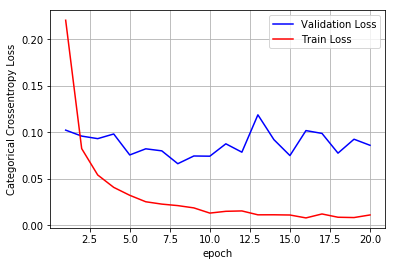

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 784-582-388-194-10-SequentialModel + BN

In [0]:
# some model parameters
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20
model = Sequential()
model.add(Dense(582, input_dim = 784, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(288, input_dim = 582, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(194, input_dim = 288, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, input_dim = 194, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.1755 - acc: 0.9461 - val_loss: 0.1142 - val_acc: 0.9635
Epoch 2/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0715 - acc: 0.9774 - val_loss: 0.0946 - val_acc: 0.9712
Epoch 3/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0480 - acc: 0.9849 - val_loss: 0.0819 - val_acc: 0.9744
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0400 - acc: 0.9873 - val_loss: 0.0876 - val_acc: 0.9734
Epoch 5/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0341 - acc: 0.9885 - val_loss: 0.0890 - val_acc: 0.9742
Epoch 6/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0258 - acc: 0.9917 - val_loss: 0.0791 - val_acc: 0.9779
Epoch 7/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0235 - acc: 0.9919 - val_loss: 0.0939 - val_acc

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 582)               456870    
_________________________________________________________________
batch_normalization_5 (Batch (None, 582)               2328      
_________________________________________________________________
dense_37 (Dense)             (None, 288)               167904    
_________________________________________________________________
batch_normalization_6 (Batch (None, 288)               1152      
_________________________________________________________________
dense_38 (Dense)             (None, 194)               56066     
_________________________________________________________________
batch_normalization_7 (Batch (None, 194)               776       
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1950      
Total para

Test score: 0.07521539941053489
Test accuracy: 0.9822


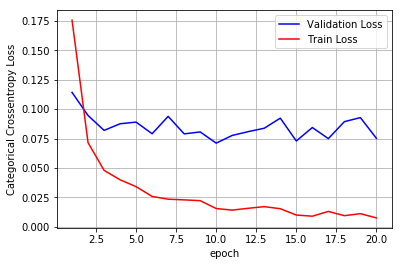

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 784-582-388-194-10-SequentialModel + Dropout

In [0]:
# some model parameters
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20
model = Sequential()
model.add(Dense(582, input_dim = 784, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(288, input_dim = 582, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(194, input_dim = 288, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(10, input_dim = 194, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.4954 - acc: 0.8434 - val_loss: 0.1433 - val_acc: 0.9559
Epoch 2/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2096 - acc: 0.9407 - val_loss: 0.1183 - val_acc: 0.9657
Epoch 3/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.1647 - acc: 0.9541 - val_loss: 0.0900 - val_acc: 0.9724
Epoch 4/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.1403 - acc: 0.9594 - val_loss: 0.0925 - val_acc: 0.9711
Epoch 5/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.1194 - acc: 0.9659 - val_loss: 0.0754 - val_acc: 0.9768
Epoch 6/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.1107 - acc: 0.9679 - val_loss: 0.0749 - val_acc: 0.9778
Epoch 7/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.1019 - acc: 0.9703 - val_loss: 0.0692 - val_acc

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 582)               456870    
_________________________________________________________________
dropout_5 (Dropout)          (None, 582)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 288)               167904    
_________________________________________________________________
dropout_6 (Dropout)          (None, 288)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 194)               56066     
_________________________________________________________________
dropout_7 (Dropout)          (None, 194)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                1950      
Total para

Test score: 0.06682071717691342
Test accuracy: 0.9834


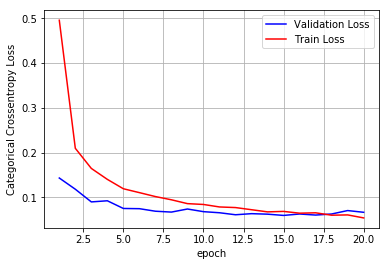

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 784-582-388-194-10-SequentialModel + Dropout + BN

In [0]:
# some model parameters
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20
model = Sequential()
model.add(Dense(582, input_dim = 784, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(288, input_dim = 582, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(194, input_dim = 288, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(10, input_dim = 194, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.4911 - acc: 0.8504 - val_loss: 0.1405 - val_acc: 0.9553
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.2236 - acc: 0.9336 - val_loss: 0.1086 - val_acc: 0.9656
Epoch 3/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1691 - acc: 0.9493 - val_loss: 0.1013 - val_acc: 0.9696
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1469 - acc: 0.9552 - val_loss: 0.0857 - val_acc: 0.9738
Epoch 5/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1276 - acc: 0.9614 - val_loss: 0.0799 - val_acc: 0.9757
Epoch 6/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.1192 - acc: 0.9643 - val_loss: 0.0769 - val_acc: 0.9768
Epoch 7/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1096 - acc: 0.9667 - val_loss: 0.0735 - val_acc

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 582)               456870    
_________________________________________________________________
batch_normalization_8 (Batch (None, 582)               2328      
_________________________________________________________________
dropout_8 (Dropout)          (None, 582)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 288)               167904    
_________________________________________________________________
batch_normalization_9 (Batch (None, 288)               1152      
_________________________________________________________________
dropout_9 (Dropout)          (None, 288)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 194)               56066     
__________

Test score: 0.05983107085300144
Test accuracy: 0.9835


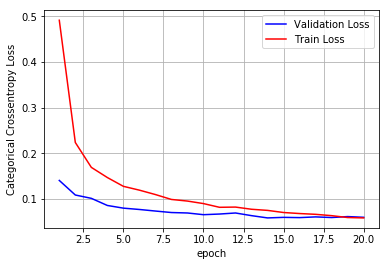

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Model Genration 5 Hidden Layer
## 784-645-516-387-258-129-10-SequentialModel

In [0]:
# some model parameters
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20
model = Sequential()
model.add(Dense(645, input_dim = 784, activation='relu'))
model.add(Dense(516, input_dim = 645, activation='relu'))
model.add(Dense(387, input_dim = 516, activation='relu'))
model.add(Dense(258, input_dim = 387, activation='relu'))
model.add(Dense(129, input_dim = 258, activation='relu'))
model.add(Dense(10, input_dim = 129, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.2297 - acc: 0.9313 - val_loss: 0.1040 - val_acc: 0.9674
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0947 - acc: 0.9720 - val_loss: 0.1143 - val_acc: 0.9651
Epoch 3/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0636 - acc: 0.9805 - val_loss: 0.0905 - val_acc: 0.9720
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0502 - acc: 0.9842 - val_loss: 0.0878 - val_acc: 0.9754
Epoch 5/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0405 - acc: 0.9877 - val_loss: 0.0783 - val_acc: 0.9779
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0336 - acc: 0.9897 - val_loss: 0.0881 - val_acc: 0.9795
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0287 - acc: 0.9913 - val_loss: 0.0951 - val_acc

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 645)               506325    
_________________________________________________________________
dense_80 (Dense)             (None, 516)               333336    
_________________________________________________________________
dense_81 (Dense)             (None, 387)               200079    
_________________________________________________________________
dense_82 (Dense)             (None, 258)               100104    
_________________________________________________________________
dense_83 (Dense)             (None, 129)               33411     
_________________________________________________________________
dense_84 (Dense)             (None, 10)                1300      
Total params: 1,174,555
Trainable params: 1,174,555
Non-trainable params: 0
_________________________________________________________________


Test score: 0.092317029833065
Test accuracy: 0.9806


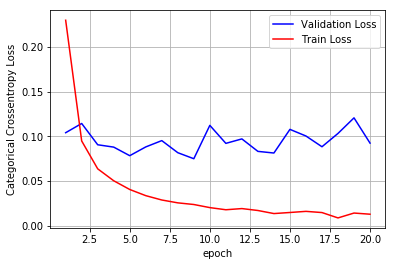

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 784-645-516-387-258-129-10-SequentialModel + BN

In [0]:
# some model parameters
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20
model = Sequential()
model.add(Dense(645, input_dim = 784, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(516, input_dim = 645, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(387, input_dim = 516, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(258, input_dim = 387, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(129, input_dim = 258, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, input_dim = 129, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.1827 - acc: 0.9437 - val_loss: 0.1072 - val_acc: 0.9671
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0848 - acc: 0.9728 - val_loss: 0.0891 - val_acc: 0.9713
Epoch 3/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0633 - acc: 0.9796 - val_loss: 0.1016 - val_acc: 0.9695
Epoch 4/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0493 - acc: 0.9843 - val_loss: 0.0767 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0433 - acc: 0.9862 - val_loss: 0.0902 - val_acc: 0.9740
Epoch 6/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0373 - acc: 0.9878 - val_loss: 0.0681 - val_acc: 0.9798
Epoch 7/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0345 - acc: 0.9886 - val_loss: 0.0706 - val_a

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 645)               506325    
_________________________________________________________________
batch_normalization_33 (Batc (None, 645)               2580      
_________________________________________________________________
dense_104 (Dense)            (None, 516)               333336    
_________________________________________________________________
batch_normalization_34 (Batc (None, 516)               2064      
_________________________________________________________________
dense_105 (Dense)            (None, 387)               200079    
_________________________________________________________________
batch_normalization_35 (Batc (None, 387)               1548      
_________________________________________________________________
dense_106 (Dense)            (None, 258)               100104    
__________

Test score: 0.08501737653187884
Test accuracy: 0.9816


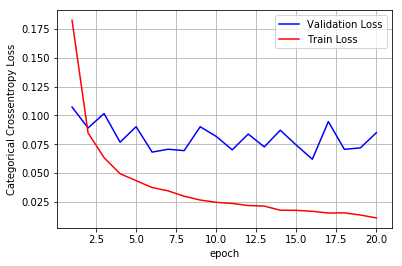

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)    

## 784-645-516-387-258-129-10-SequentialModel + Dropout

In [0]:
# some model parameters
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20
model = Sequential()
model.add(Dense(645, input_dim = 784, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(516, input_dim = 645, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(387, input_dim = 516, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(258, input_dim = 387, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(129, input_dim = 258, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(10, input_dim = 129, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.7682 - acc: 0.7484 - val_loss: 0.1894 - val_acc: 0.9479
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.2753 - acc: 0.9287 - val_loss: 0.1421 - val_acc: 0.9630
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.2197 - acc: 0.9433 - val_loss: 0.1225 - val_acc: 0.9690
Epoch 4/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1921 - acc: 0.9512 - val_loss: 0.1075 - val_acc: 0.9703
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1713 - acc: 0.9569 - val_loss: 0.1034 - val_acc: 0.9721
Epoch 6/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1567 - acc: 0.9607 - val_loss: 0.0923 - val_acc: 0.9745
Epoch 7/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.1450 - acc: 0.9642 - val_loss: 0.0900 - val_ac

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 645)               506325    
_________________________________________________________________
dropout_29 (Dropout)         (None, 645)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 516)               333336    
_________________________________________________________________
dropout_30 (Dropout)         (None, 516)               0         
_________________________________________________________________
dense_111 (Dense)            (None, 387)               200079    
_________________________________________________________________
dropout_31 (Dropout)         (None, 387)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 258)               100104    
__________

Test score: 0.07709364176348153
Test accuracy: 0.9837


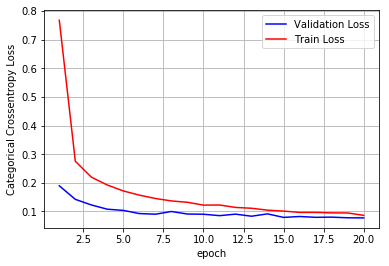

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 784-645-516-387-258-129-10-SequentialModel + BN + dropout

In [0]:
# some model parameters
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20
model = Sequential()
model.add(Dense(645, input_dim = 784, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(516, input_dim = 645, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(387, input_dim = 516, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(258, input_dim = 387, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(129, input_dim = 258, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))
model.add(Dense(10, input_dim = 129, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.7401 - acc: 0.7751 - val_loss: 0.1834 - val_acc: 0.9470
Epoch 2/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2765 - acc: 0.9214 - val_loss: 0.1435 - val_acc: 0.9578
Epoch 3/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2084 - acc: 0.9404 - val_loss: 0.1134 - val_acc: 0.9680
Epoch 4/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.1827 - acc: 0.9489 - val_loss: 0.1008 - val_acc: 0.9715
Epoch 5/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.1612 - acc: 0.9547 - val_loss: 0.0933 - val_acc: 0.9726
Epoch 6/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.1455 - acc: 0.9588 - val_loss: 0.0849 - val_acc: 0.9766
Epoch 7/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.1332 - acc: 0.9625 - val_loss: 0.0817 - val_a

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 645)               506325    
_________________________________________________________________
batch_normalization_38 (Batc (None, 645)               2580      
_________________________________________________________________
dropout_34 (Dropout)         (None, 645)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 516)               333336    
_________________________________________________________________
batch_normalization_39 (Batc (None, 516)               2064      
_________________________________________________________________
dropout_35 (Dropout)         (None, 516)               0         
_________________________________________________________________
dense_117 (Dense)            (None, 387)               200079    
__________

Test score: 0.06173668301170692
Test accuracy: 0.9835


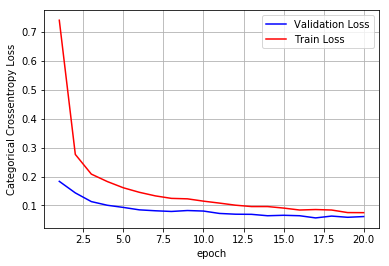

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Conclusion

In [0]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x= PrettyTable()
x.field_names= ["No of Hidden Layer", "Activation Units in Hidden Layers", "BatchNormalization", "Dropout", 'Test score', 'Test accuracy']
x.add_row([2, '784-516-258-10', 'No', 'No', 0.10316445550172403, 0.98])
x.add_row([2, '784-516-258-10', 'Yes', 'No', 0.0779808205377387, 0.9807])
x.add_row([2, '784-516-258-10', 'No', 'Yes', 0.061835459499752866, 0.984])
x.add_row([2, '784-516-258-10', 'Yes', 'Yes', 0.05232281187833869, 0.9845])
x.add_row([3, '784-582-388-194-10', 'No', 'No', 0.08606561110741959, 0.9826])
x.add_row([3, '784-582-388-194-10', 'Yes', 'No', 0.07521539941053489, 0.9822])
x.add_row([3, '784-582-388-194-10', 'No', 'Yes', 0.06682071717691342, 0.9834])
x.add_row([3, '784-582-388-194-10', 'Yes', 'Yes', 0.05983107085300144, 0.9835])
x.add_row([5, '784-645-516-387-258-129-10', 'No', 'No', 0.092317029833065, 0.9806])
x.add_row([5, '784-645-516-387-258-129-10', 'Yes', 'No', 0.08501737653187884, 0.9816])
x.add_row([5, '784-645-516-387-258-129-10', 'No', 'Yes', 0.07709364176348153, 0.9837])
x.add_row([5, '784-645-516-387-258-129-10', 'Yes', 'Yes', 0.06173668301170692, 0.9835])
print(x)

+--------------------+-----------------------------------+--------------------+---------+----------------------+---------------+
| No of Hidden Layer | Activation Units in Hidden Layers | BatchNormalization | Dropout |      Test score      | Test accuracy |
+--------------------+-----------------------------------+--------------------+---------+----------------------+---------------+
|         2          |           784-516-258-10          |         No         |    No   | 0.10316445550172403  |      0.98     |
|         2          |           784-516-258-10          |        Yes         |    No   |  0.0779808205377387  |     0.9807    |
|         2          |           784-516-258-10          |         No         |   Yes   | 0.061835459499752866 |     0.984     |
|         2          |           784-516-258-10          |        Yes         |   Yes   | 0.05232281187833869  |     0.9845    |
|         3          |         784-582-388-194-10        |         No         |    No   | 0.08606